# **Tugas Pagerank dan Implementasi Github**

## **Tugas Pagerank**

1. Buat graph berarah dengan networkx (minimal 9 node)

*   Hitung manual pagerank dari graph yang anda buat
*   Hitung menggunakan pagerank menggunakan networkx

In [1]:
%%capture
pip install networkx

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [13]:
G = nx.DiGraph() #Fungsi Digraph adalah fungsi untuk membuat graph yang berarah
G.add_edges_from([(1,2),(2,4),(2,6),(3,1),(4,7),(5,3),(6,5),(7,8),(7,6),(8,9),(9,5)])

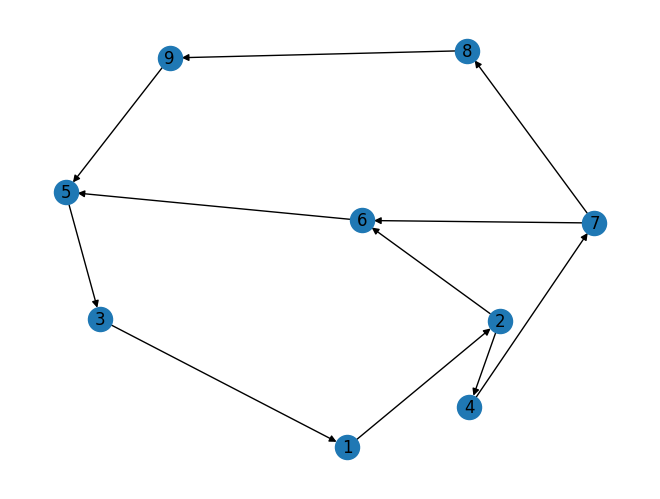

In [16]:
nx.draw(G,with_labels=True)

## Perhitungan Manual Pagerank

## Perhitungan menggunakan Network

In [17]:
pr = nx.pagerank(G)
pr

{1: 0.14953888767990098,
 2: 0.1437732533523981,
 4: 0.07777117153751645,
 6: 0.11294913822865035,
 3: 0.1563195842825949,
 7: 0.08277138600631317,
 5: 0.16429707462058898,
 8: 0.05184463335780058,
 9: 0.06073487093423637}

In [18]:
sorted(pr, key=pr.get, reverse=True)

[5, 3, 1, 2, 6, 7, 4, 9, 8]

# **Implementasi Github Shakunni/Extractive-Text-Summarization**

## Instalasi PyPDF2 dan docx2txt

In [19]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 9.8 MB/s eta 0:00:00


In [20]:
!pip install docx2txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3977 sha256=0b9e8187e67f22a731519666c3252465f8ce53a7ee8c1faa08be70ae9d858dde
  Stored in directory: /root/.cache/pip/wheels/22/58/cf/093d0a6c3ecfdfc5f6ddd5524043b88e59a9a199cb02352966
Successfully built docx2txt


## **Implementasi**

### **1. Import Library**

In [21]:
import numpy as np
import PyPDF2
import docx2txt
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
from nltk.tokenize.punkt import PunktSentenceTokenizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

### **2. Fungsi untuk membaca dokumen dari user**

In [22]:
def readDoc():
    name = input('Please input a file name: ') 
    print('You have asked for the document {}'.format(name))

    # now read the type of document
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
        # print(name)
    print(choice)
    # Case 1: if it is a .txt file
        
    if choice == 1:
        f = open(name, 'r')
        document = f.read()
        f.close()
            
    # Case 2: if it is a .pdf file
    elif choice == 2:
        pdfFileObj = open(name, 'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    # Case 3: none of the format
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    print(type(document))
    return document

### **3. Fungsi untuk melakukan tokenisasi pada dokumen**

In [23]:
def tokenize(document):
    # We are tokenizing using the PunktSentenceTokenizer
    # we call an instance of this class as sentence_tokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    
    # tokenize() method: takes our document as input and returns a list of all the sentences in the document
    
    # sentences is a list containing each sentence of the document as an element
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

### **4. Membaca Dokumen**

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
# reading a file and 
# printing the size of the file
document = readDoc()
print('The length of the file is:', end=' ')
print(len(document))

Please input a file name: /content/drive/MyDrive/prosaindata/story1.txt
You have asked for the document /content/drive/MyDrive/prosaindata/story1.txt
1
<class 'str'>
The length of the file is: 7125


### **5. Menampilkan kalimat pada dokumen kedalam list**

In [26]:
sentences_list = tokenize(document)

# let us print the size of memory used by the list sentences
print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))

# the size of one of the element of the list
print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))

The size of the list in Bytes is: 872
The size of the item 0 in Bytes is: 147


In [27]:
for i in sentences_list:
    print(i)

 In Banaras District there is a village called Bira in which an old, childless
widow used to live.
She was a Gond woman named Bhungi and she didn't
own either a scrap of land or a house to live in.
Her only source of livelihood
was a parching oven.
The village folk customarily have one meal a day of
parched grains, so there was always a crowd around Bhungi's oven.
Whatever grain she was paid for parching she would grind or fry and eat it.
She slept in a corner of the same little shack that sheltered the oven.
As soon
as it was light she'd get up and go out to gather dry leaves from all around to
make her fire.
She would stack the leaves right next to the oven, and after
twelve, light the fire.
But on the days when she had to parch grain for Pandit
Udaybhan Pandey, the owner of the village, she went to bed hungry.
She
was obliged to work without pay for Pandit Udaybhan Pandey She also had
to fetch water for his house.
And, for this reason, from time to time the oven
was not lit.
She liv

### **6. Melakukan perhitungan untuk menghasilkan term-document matrix (TD Matrix) pada dokumen**

In [28]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [29]:
cv_demo = CountVectorizer()
text_demo = ["Ashish is good, you are bad", "I am not bad"] 
res_demo = cv_demo.fit_transform(text_demo)
print('Result demo array is {}'.format(res_demo.toarray()))

# Result is 2-d matrix containing document text matrix
# Notice that in the second row, there is 2.
# also, bad is repeated twice in that sentence.
# so we can infer that 2 is corresponding to the word 'bad'
print('Feature list: {}'.format(cv_demo.get_feature_names_out()))

Result demo array is [[0 1 1 1 1 1 0 1]
 [1 0 0 1 0 0 1 0]]
Feature list: ['am' 'are' 'ashish' 'bad' 'good' 'is' 'not' 'you']


In [30]:
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names_out())
print(cv_matrix.toarray())

The data type of bow matrix <class 'scipy.sparse._csr.csr_matrix'>
Shape of the matrix <bound method spmatrix.get_shape of <101x492 sparse matrix of type '<class 'numpy.int64'>'
	with 1223 stored elements in Compressed Sparse Row format>>
Size of the matrix is: 48
['able' 'accept' 'acted' 'afraid' 'after' 'again' 'against' 'alarmed'
 'alas' 'all' 'already' 'also' 'always' 'am' 'amid' 'amidst' 'an' 'and'
 'anger' 'another' 'any' 'anybody' 'are' 'around' 'arrived' 'as' 'ashes'
 'asked' 'at' 'attendants' 'attention' 'authority' 'available' 'away'
 'balls' 'banaras' 'band' 'barn' 'basket' 'baskets' 'be' 'because' 'bed'
 'been' 'before' 'began' 'being' 'belly' 'bewildered' 'bhungi' 'bira'
 'blaze' 'body' 'bold' 'breaking' 'breath' 'broke' 'build' 'building'
 'built' 'but' 'by' 'called' 'came' 'can' 'carrying' 'cereal' 'childless'
 'chores' 'clay' 'clustering' 'collapsed' 'collect' 'coming' 'command'
 'completely' 'conflagration' 'considered' 'consumed' 'cooked' 'corner'
 'could' 'courage' '

In [31]:
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.24450772 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [32]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T

<bound method _cs_matrix.toarray of <492x101 sparse matrix of type '<class 'numpy.float64'>'
	with 1223 stored elements in Compressed Sparse Column format>>


### **7. Menampilkan Hasil Graph kedalam gambar**

Number of edges 3319
Number of vertices 101


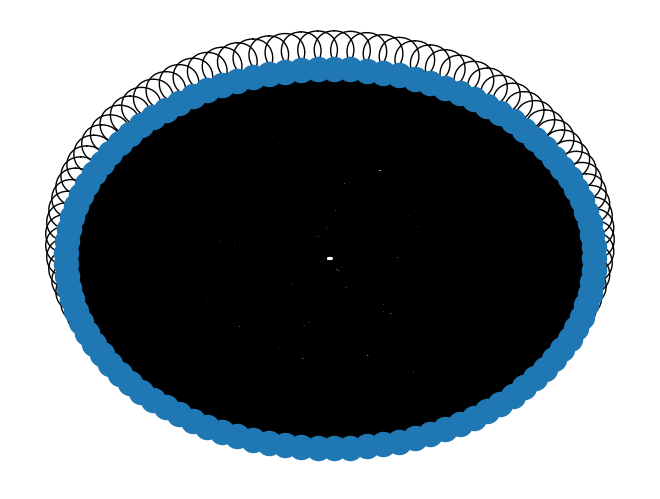

The memory used by the graph in Bytes is: 48


In [33]:
nx_graph = nx.from_scipy_sparse_array(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

### **8. Mengambil rank pada setiap kalimat menggunakan textrank**

In [34]:
# ranks is a dictionary with key=node(sentences) and value=textrank (the rank of each of the sentences)
ranks = nx.pagerank(nx_graph)

# analyse the data type of ranks
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

# print the dictionary
for i in ranks:
    print(i, ranks[i])

<class 'dict'>
The size used by the dictionary in Bytes is: 4696
0 0.008473050396994235
1 0.011136728928068603
2 0.009383758113199747
3 0.010305311473077004
4 0.011387878003998006
5 0.011453806553948459
6 0.011956616615231173
7 0.013007582297781907
8 0.01646287839865644
9 0.011870375394732305
10 0.012805637163062402
11 0.012625721662310345
12 0.010081809427917856
13 0.012615817098175835
14 0.009951004198363802
15 0.012312866898217463
16 0.00905563154351586
17 0.007114339155021146
18 0.0067471140170273294
19 0.01107854731351773
20 0.010166769608001893
21 0.012780859072392963
22 0.012641302785309182
23 0.009348558444248853
24 0.010022831759849004
25 0.013720926664709483
26 0.00967523353291061
27 0.013901992235429548
28 0.009475796944343159
29 0.008121737705990758
30 0.010128784557098498
31 0.010061180193377258
32 0.007628895359126891
33 0.008648669935446914
34 0.009607446148227936
35 0.008321167851894651
36 0.005865449854506728
37 0.010850655936218322
38 0.01016989679015465
39 0.01131627

### **9. Mencari kalimat yang paling penting dari hasil textrank**

In [35]:
# enumerate method: returns an enumerate object
# Use of list Comprehensions
# O/p: sentence_array is the sorted(descending order w.r.t. score value) 2-d array of ranks[sentence] and sentence 
# For example, if there are two sentences: S1 (with a score of S1 = s1) and S2 with score s2, with s2>s1
# then sentence_array is [[s2, S2], [s1, S1]]
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [36]:
# as sentence_array is in descending order wrt score value
# fmax is the largest score value(the score of first element)
# fmin is the smallest score value(the score of last element)

rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

In [37]:
# print the largest and smallest value of scores of the sentence
print(rank_max)
print(rank_min)

0.01646287839865644
0.005429708840559132


In [38]:
# Normalization of the scores
# so that it comes out in the range 0-1
# fmax becomes 1
# fmin becomes 0
# store the normalized values in the list temp_array

temp_array = []

# if all sentences have equal ranks, means they are all the same
# taking any sentence will give the summary, say the first sentence
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# If the sentence has different ranks
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))

101


In [39]:
# Calculation of threshold:
# We take the mean value of normalized scores
# any sentence with the normalized score 0.2 more than the mean value is considered to be 
threshold = (sum(temp_array) / len(temp_array)) + 0.2

In [40]:
# Separate out the sentences that satiasfy the criteria of having a score above the threshold
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

In [41]:
model = sentence_list

### **10. Memasukkan kalimat yang paling penting kedalam file dokumen yang baru**

In [42]:
# print(sentence_list)
summary = " ".join(str(x) for x in sentence_list)
print(summary)
# save the data in another file, names sum.txt
f = open('final3.txt', 'a+')
#print(type(f))
f.write('\n')
f.write(summary)
f.close

But on the days when she had to parch grain for Pandit
Udaybhan Pandey, the owner of the village, she went to bed hungry. People went to Panditji and asked him to
give the order for the old woman's oven to be rebuilt and the fire once more
lighted, but he paid no attention to them. 'If you’re going to stay in the village you'll have to do my chores. He kicked at the trough again but she ran in front of it
and took the kick in her side. She had to
keep stopping from the parching in order to keep the oven fire going. Bhungi was energetically rebuilding it with balls of clay Most
likely she'd spent the night at this work and wanted to finish it before the sun
was high. With this command the servants went away and Bhungi began to parch the
grain. Here she had
known the sorrows and pleasures of life; she could not give it up now in the
last days. ‘To his attendants he said, 'Go get a pile of leaves right
away and set fire to the whole thing; we'll show her how to make an oven. By now the
wh

<function TextIOWrapper.close()>

In [43]:
for lines in sentence_list:
    print(lines)

But on the days when she had to parch grain for Pandit
Udaybhan Pandey, the owner of the village, she went to bed hungry.
People went to Panditji and asked him to
give the order for the old woman's oven to be rebuilt and the fire once more
lighted, but he paid no attention to them.
'If you’re going to stay in the village you'll have to do my chores.
He kicked at the trough again but she ran in front of it
and took the kick in her side.
She had to
keep stopping from the parching in order to keep the oven fire going.
Bhungi was energetically rebuilding it with balls of clay Most
likely she'd spent the night at this work and wanted to finish it before the sun
was high.
With this command the servants went away and Bhungi began to parch the
grain.
Here she had
known the sorrows and pleasures of life; she could not give it up now in the
last days.
‘To his attendants he said, 'Go get a pile of leaves right
away and set fire to the whole thing; we'll show her how to make an oven.
By now the
wh